## EC Notebook for Lecture 29:  Scatterplots and Correlation

This extra credit Python notebook will let you practice the material you saw in lecture.  Completing all parts of this notebook will earn +1 extra credit point to your grade in STAT 107! :)

This notebook is worth +1 if turned in before 11:30 am on **Wednesday, Nov. 06** *(30 minutes before the next STAT 107 lecture)*.  You can feel free to complete it anytime for extra practice.

### Importing pandas and reading data
For this extra credit notebook, we will use the Diamonds dataset to do some exercise. At first, you need to import the library pandas and reading the dataset.

###  1. Scatter Plots
After loading the data, create scatter plots with the columns `carat` and `price`.

       carat      cut color clarity  depth  table  price     x     y     z
41216   0.40  Premium     D    VVS2   62.0   61.0   1206  4.72  4.70  2.92
29854   0.30  Premium     D     VS2   60.6   59.0    710  4.28  4.36  2.62
51656   0.30    Ideal     G     VS2   62.3   58.0    545  4.26  4.28  2.66
24516   2.02     Good     J     SI1   63.5   60.0  12798  7.93  7.98  5.05
37482   0.35    Ideal     E     VS2   61.7   55.0    984  4.57  4.54  2.81


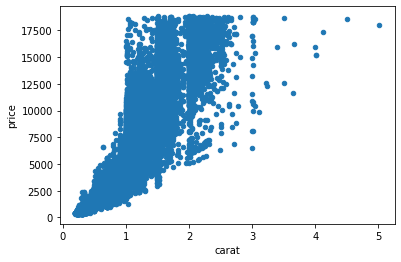

In [45]:
#import pandas
import pandas as pd
df = pd.read_csv('Diamonds.csv')


print(df.sample(5))
df.plot.scatter(x='carat',y='price')

### 2. Correlation Coefficient

Create a new DataFrame called `cc_table` to display the correlation coefficient for every numeric column in `df`. Find tree variables which have most closest linear association with `price` (i.e. three highest absolute correlation coefficient including itself).

In [46]:
cc_table = df.corr()
df2 = df[['price','carat','x']]
cc = df2.corr()
three_most_linear = cc[['price','carat','x']]


print(cc_table)
print(three_most_linear)


          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000
          price     carat         x
price  1.000000  0.921591  0.884435
carat  0.921591  1.000000  0.975094
x      0.884435  0.975094  1.000000


### 3. Calculate the Correlation Coefficient
Now let's calculate the correlation coefficient between `carat` and `price` by ourselves according to the following steps:

1. Calculate the mean and sd for `carat` and `price` accordingly.
2. Add three new columns, the z-value of carat `z_carat`, the z-value of price `z_price` and the product of them `z_product`.
3. Calculate the correlation coefficient `r`.


In [47]:
mean_carat = df['carat'].mean()
sd_carat = df['carat'].std()
mean_price = df['price'].mean()
sd_price = df['price'].std()
df['z_carat'] = (df['carat'] - mean_carat) / sd_carat
df['z_price'] = (df['price'] - mean_price) / sd_price
df['z_product'] = df['z_carat'] * df['z_price']
r = df['z_product'].sum() / (len(df['z_product']) - 1)


print(r)
df.sample(5)

0.921591301193568


,carat,cut,color,clarity,depth,table,price,x,y,z,z_carat,z_price,z_product
44343,0.56,Very Good,G,VS2,62.5,57.0,1580,5.25,5.28,3.29,-0.501971,-0.589757,0.296041
27424,2.26,Very Good,D,SI2,61.6,61.0,18028,8.47,8.38,5.19,3.084442,3.533128,10.897728
21045,0.31,Ideal,H,VVS2,61.8,56.0,625,4.34,4.36,2.69,-1.029384,-0.829139,0.853503
12043,0.34,Ideal,G,VS2,62.1,55.0,596,4.46,4.49,2.78,-0.966095,-0.836408,0.808049
34365,0.41,Ideal,E,VS1,62.3,53.0,863,4.74,4.76,2.96,-0.818419,-0.769481,0.629758


In [48]:
## == TEST CASES for Part 1,2,3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(cc_table) == 7), "Make sure you create the correct table."
assert(len(three_most_linear) == 3), "Make sure you select the top 3 linear variable with price."
assert(abs(three_most_linear['price']-1.0) < 0.001 and abs(three_most_linear['carat']-0.921591) < 0.001 and abs(three_most_linear['x']-0.884435) < 0.001), "Make sure you select the top 3 linear variable with price."
assert(abs(mean_carat-0.7979)<0.001 and abs(sd_carat-0.47401) < 0.001 and abs(mean_price-3932.79972) < 0.001 and abs(sd_price-3989.439738) < 0.001), "Make sure you calculate the mean and sd correct."
assert(abs(df['z_carat']*sd_carat+mean_carat-df['carat']).sum() < 0.001 and abs(df['z_price']*sd_price+mean_price-df['price']).sum()< 0.001), "Make sure you calculate the z values correct."
assert(abs(r-cc_table['price']['carat']) < 0.001), "Make sure you calculate the correct r value."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [50]:
abs(three_most_linear['price']-1.0)

price    0.000000
carat    0.078409
x        0.115565
Name: price, dtype: float64